![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_lingual/multi_class_text_classification/NLU_training_multi_lingual_multi_class_text_classifier_demo_amazon.ipynb)




# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
## 3 class Amazon Phone review classifier training]
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data :

<br>


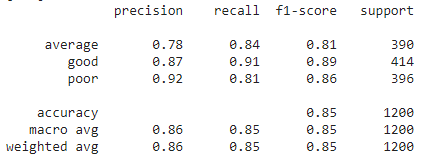



You can achieve these results or even better on this dataset with test data :

<br>

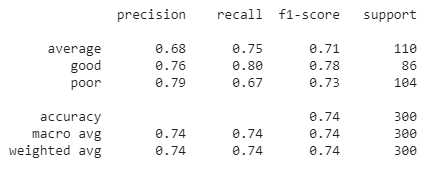

# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 09:22:33--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 09:22:33 (28.5 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...


# 2. Download Amazon Unlocked mobile phones dataset 
https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

dataset with unlocked mobile phone reviews in 5 review classes


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/Amazon_Unlocked_Mobile_multi_lingual.csv

--2021-05-05 09:23:07--  http://ckl-it.de/wp-content/uploads/2021/02/Amazon_Unlocked_Mobile_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511871 (500K) [text/csv]
Saving to: ‘Amazon_Unlocked_Mobile_multi_lingual.csv.1’

Amazon_Unlocked_Mob 100%[===================>] 499.87K   810KB/s    in 0.6s    

2021-05-05 09:23:08 (810 KB/s) - ‘Amazon_Unlocked_Mobile_multi_lingual.csv.1’ saved [511871/511871]



In [ ]:
import pandas as pd
test_path = '/content/Amazon_Unlocked_Mobile_multi_lingual.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
1266,good,This is like the 5th cellphone for my dad in l...
121,poor,I bought this phone to give as a gift to a fri...
528,good,"nice phone, nice up grade from my pantach revu..."
151,good,Ver Good!
892,good,excellent product in perfect condition
...,...,...
1490,average,So far so good. Needed a stopgap for my old Ne...
894,average,Good phone overall. Excellent speakers and ver...
314,good,"I love it, the only problem is the camera its ..."
53,average,"The battery goes down to quick, takes a while ..."


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_classifier_dl'].setMaxEpochs(60)  
trainable_pipe['trainable_classifier_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['classifier_dl']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

     average       0.78      0.84      0.81       390
        good       0.87      0.91      0.89       414
        poor       0.92      0.81      0.86       396

    accuracy                           0.85      1200
   macro avg       0.86      0.85      0.85      1200
weighted avg       0.86      0.85      0.85      1200



,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,text,sentence,y
0,This is like the 5th cellphone for my dad in l...,good,1266,0.990780,"[-0.04503230005502701, -0.0068597435019910336,...",This is like the 5th cellphone for my dad in l...,[This is like the 5th cellphone for my dad in ...,good
1,I bought this phone to give as a gift to a fri...,poor,121,0.995079,"[-0.053808409720659256, 0.043268490582704544, ...",I bought this phone to give as a gift to a fri...,[I bought this phone to give as a gift to a fr...,poor
2,"nice phone, nice up grade from my pantach revu...",good,528,1.000000,"[-0.031718023121356964, 0.05311667174100876, -...","nice phone, nice up grade from my pantach revu...","[nice phone, nice up grade from my pantach rev...",good
3,Ver Good!,good,151,0.999916,"[0.004338219296187162, -0.05601995438337326, -...",Ver Good!,[Ver Good!],good
4,excellent product in perfect condition,good,892,0.999986,"[-0.045638032257556915, 0.013802768662571907, ...",excellent product in perfect condition,[excellent product in perfect condition],good
...,...,...,...,...,...,...,...,...
1195,So far so good. Needed a stopgap for my old Ne...,average,1490,0.997774,"[-0.03902469947934151, 0.03762187063694, -0.01...",So far so good. Needed a stopgap for my old Ne...,"[So far so good., Needed a stopgap for my old ...",average
1196,Good phone overall. Excellent speakers and ver...,average,894,0.999868,"[-0.0373789444565773, -0.011103338561952114, -...",Good phone overall. Excellent speakers and ver...,"[Good phone overall., Excellent speakers and v...",average
1197,"I love it, the only problem is the camera its ...",average,314,0.999975,"[0.0009155190782621503, -0.04911276325583458, ...","I love it, the only problem is the camera its ...","[I love it, the only problem is the camera its...",good
1198,"The battery goes down to quick, takes a while ...",poor,53,0.535710,"[-0.06607282906770706, 0.012522447854280472, -...","The battery goes down to quick, takes a while ...","[The battery goes down to quick, takes a while...",average


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

              precision    recall  f1-score   support

     average       0.68      0.75      0.71       110
        good       0.76      0.80      0.78        86
        poor       0.79      0.67      0.73       104

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



#4. Test Model  with  20 languages!

In [ ]:
train_df = pd.read_csv("Amazon_Unlocked_Mobile_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

preds

              precision    recall  f1-score   support

     average       0.65      0.90      0.75        29
        good       0.85      0.88      0.86        32
        poor       1.00      0.69      0.82        39

    accuracy                           0.81       100
   macro avg       0.83      0.82      0.81       100
weighted avg       0.85      0.81      0.81       100



,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,text,sentence,y
0,"Alındı, onu yandırdı, işləmədi. Geri açıldı, b...",poor,0,0.999992,"[0.023933352902531624, 0.03197602182626724, -0...","Alındı, onu yandırdı, işləmədi. Geri açıldı, b...","[Alındı, onu yandırdı, işləmədi., Geri açıldı,...",poor
1,"דערווייַל עס איז 2014, די 3gs איז דיסקאַנטיניו...",average,1,1.000000,"[-0.019562795758247375, -0.03646012768149376, ...","דערווייַל עס איז 2014, די 3gs איז דיסקאַנטיניו...","[דערווייַל עס איז 2014, די 3gs איז דיסקאַנטיני...",average
2,100% recommended,good,2,0.999967,"[0.022297078743577003, -0.038920555263757706, ...",100% recommended,[100% recommended],good
3,Đó là một chiếc điện thoại tốt nhưng nếu bạn s...,good,3,0.999701,"[0.023473074659705162, -0.056649111211299896, ...",Đó là một chiếc điện thoại tốt nhưng nếu bạn s...,[Đó là một chiếc điện thoại tốt nhưng nếu bạn ...,average
4,វាល្អដែលទូរស័ព្ទនេះមានប្រព័ន្ធ LTE ហើយវាដំណើរក...,average,4,1.000000,"[-0.04908803477883339, 0.006140733137726784, -...",វាល្អដែលទូរស័ព្ទនេះមានប្រព័ន្ធ LTE ហើយវាដំណើរក...,[វាល្អដែលទូរស័ព្ទនេះមានប្រព័ន្ធ LTE ហើយវាដំណើរ...,average
...,...,...,...,...,...,...,...,...
95,"העלא, מיר געקויפט צוויי פאָנעס און זיי געקומען...",average,95,0.994167,"[-0.05593854561448097, 0.04983929917216301, -0...","העלא, מיר געקויפט צוויי פאָנעס און זיי געקומען...","[העלא, מיר געקויפט צוויי פאָנעס און זיי געקומע...",poor
96,Uitstekend,good,96,1.000000,"[0.017209608107805252, 0.013231031596660614, -...",Uitstekend,[Uitstekend],good
97,پروڈکٹ اچھی ہے لیکن انگریزی زبان میں اب بھی چی...,average,97,0.999992,"[-0.0447855070233345, 0.03711877763271332, -0....",پروڈکٹ اچھی ہے لیکن انگریزی زبان میں اب بھی چی...,[پروڈکٹ اچھی ہے لیکن انگریزی زبان میں اب بھی چ...,poor
98,Veronderstel om 'n splinternuwe ontsluitfoon t...,poor,98,0.999984,"[-0.0475904643535614, 0.04630507901310921, -0....",Veronderstel om 'n splinternuwe ontsluitfoon t...,[Veronderstel om 'n splinternuwe ontsluitfoon ...,poor


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("It was like brand new ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,It was like brand new,good,0,0.971137,"[0.02449253760278225, -0.003671379294246435, -...",[It was like brand new]


In [ ]:
fitted_pipe.predict("It stopped working on the first day ")


,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,It stopped working on the first day,poor,0,0.999895,"[-0.0048237149603664875, 0.020508447661995888,...",[It stopped working on the first day]


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for: 'It worked perfectly '
fitted_pipe.predict("Es hat perfekt funktioniert")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Es hat perfekt funktioniert,good,0,0.998511,"[-0.005111832171678543, -0.048203449696302414,...",[Es hat perfekt funktioniert]


In [ ]:
# German for: 'It stopped working on the first day'
fitted_pipe.predict("Am ersten Tag hörte es auf zu arbeiten ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Am ersten Tag hörte es auf zu arbeiten,poor,0,0.999722,"[0.02086009830236435, -0.011390610598027706, 0...",[Am ersten Tag hörte es auf zu arbeiten]


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: 'It was like brand new'
fitted_pipe.predict("就像全新 ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,就像全新,good,0,0.999759,"[-0.018629543483257294, -0.023574186488986015,...",[就像全新]


In [ ]:
# Chinese for: 'It stopped working on the first day'
fitted_pipe.predict("第一天停止工作 ")
		

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,第一天停止工作,poor,0,0.99838,"[-0.0022839070297777653, 0.01226264052093029, ...",[第一天停止工作]


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:

#  Afrikaans for: 'It worked perfectly '
fitted_pipe.predict("Dit het perfek gewerk")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Dit het perfek gewerk,good,0,0.997483,"[-0.001879673101939261, -0.043611448258161545,...",[Dit het perfek gewerk]


In [ ]:
#  Afrikaans for: 'It stopped working on the first day'
fitted_pipe.predict("Dit het op die eerste dag opgehou werk ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Dit het op die eerste dag opgehou werk,poor,0,0.999799,"[0.00801782961934805, -0.01342733483761549, -0...",[Dit het op die eerste dag opgehou werk]


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Zulu for: 'It worked perfectly '
fitted_pipe.predict("Kusebenze ngokuphelele")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Kusebenze ngokuphelele,good,0,0.675412,"[0.010045904666185379, -0.05170843377709389, -...",[Kusebenze ngokuphelele]


In [ ]:
#  Zulu for: 'It stopped working on the first day'
fitted_pipe.predict("Iyeke ukusebenza ngosuku lokuqala ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Iyeke ukusebenza ngosuku lokuqala,poor,0,0.9992,"[0.004491243977099657, 0.018703386187553406, 0...",[Iyeke ukusebenza ngosuku lokuqala]


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:

#  Turkish for: 'It It worked perfectly '
fitted_pipe.predict("Mükemmel çalıştı")
		

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Mükemmel çalıştı,good,0,0.999996,"[0.06036874279379845, 0.0009111528052017093, -...",[Mükemmel çalıştı]


In [ ]:

#  Turkish for: 'It stopped working on the first day'
fitted_pipe.predict("İlk gün çalışmayı bıraktı ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,İlk gün çalışmayı bıraktı,poor,0,0.998341,"[0.050941046327352524, 0.020712943747639656, 0...",[İlk gün çalışmayı bıraktı]


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for: 'It worked perfectly '
fitted_pipe.predict("זה עבד בצורה מושלמת")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,זה עבד בצורה מושלמת,good,0,0.888842,"[-0.01338683720678091, -0.054987359791994095, ...",[זה עבד בצורה מושלמת]


In [ ]:
		
# Hebrew for: 'It stopped working on the first day'
fitted_pipe.predict("זה הפסיק לעבוד ביום הראשון ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,זה הפסיק לעבוד ביום הראשון,poor,0,0.999894,"[-0.013081019744277, -0.02689044550061226, -0....",[זה הפסיק לעבוד ביום הראשון]


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
		
# Telugu for: 'It was like brand new'
fitted_pipe.predict("ఇది సరికొత్తది ")
		

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,ఇది సరికొత్తది,good,0,0.99935,"[0.020253609865903854, -0.045859843492507935, ...",[ఇది సరికొత్తది]


In [ ]:

# Telugu for: 'It stopped working on the first day'
fitted_pipe.predict("ఇది మొదటి రోజు పనిచేయడం మానేసింది ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,ఇది మొదటి రోజు పనిచేయడం మానేసింది,poor,0,0.999886,"[0.00022219969832804054, -0.01876474916934967,...",[ఇది మొదటి రోజు పనిచేయడం మానేసింది]


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
		
#  Russian for: 'It stopped working on the first day'
fitted_pipe.predict("Перестал работать в первый же день ")
		

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Перестал работать в первый же день,poor,0,0.999956,"[-0.040550969541072845, 0.023711256682872772, ...",[Перестал работать в первый же день]


In [ ]:
#  Russian for: 'It worked perfectly '
fitted_pipe.predict("Это сработало отлично")


,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Это сработало отлично,good,0,0.992138,"[0.008218108676373959, -0.05058329924941063, -...",[Это сработало отлично]


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for: 'It was the best ever !!'
fitted_pipe.predict("C'était la meilleure chose que je n'ai jamais faite !!")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,C'était la meilleure chose que je n'ai jamais ...,good,0,0.789434,"[0.027519920840859413, -0.04782726615667343, -...",[C'était la meilleure chose que je n'ai jamais...


In [ ]:
		
# French for: 'It stopped working on the first day'
fitted_pipe.predict("Il a cessé de fonctionner le premier jour ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Il a cessé de fonctionner le premier jour,poor,0,0.99996,"[-0.02747691236436367, -0.006572246551513672, ...",[Il a cessé de fonctionner le premier jour]


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
# Thai for: 'It was the best ever !!'
fitted_pipe.predict("มันดีที่สุดเท่าที่เคยมีมา !!")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,มันดีที่สุดเท่าที่เคยมีมา !!,good,0,0.9783,"[-0.00953330472111702, -0.05253228917717934, -...",[มันดีที่สุดเท่าที่เคยมีมา !!]


In [ ]:
# Thai for: 'It stopped working on the first day'
fitted_pipe.predict("มันหยุดทำงานในวันแรก ")
		

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,มันหยุดทำงานในวันแรก,poor,0,0.999704,"[-0.02828541025519371, -0.025081545114517212, ...",[มันหยุดทำงานในวันแรก]


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:

# Khmer for: 'It was like brand new'
fitted_pipe.predict("វាដូចជាម៉ាកថ្មី ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,វាដូចជាម៉ាកថ្មី,good,0,0.998938,"[-0.013914491981267929, 0.01159849762916565, -...",[វាដូចជាម៉ាកថ្មី]


In [ ]:
		
# Khmer for: 'It stopped working on the first day'
fitted_pipe.predict("វាឈប់ធ្វើការនៅថ្ងៃដំបូង ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,វាឈប់ធ្វើការនៅថ្ងៃដំបូង,poor,0,0.999504,"[-0.012111755087971687, -0.02565937303006649, ...",[វាឈប់ធ្វើការនៅថ្ងៃដំបូង]


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
# Yiddish for: 'It was the best ever !!'
fitted_pipe.predict("עס איז געווען דער בעסטער טאָמיד !!")
		

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,עס איז געווען דער בעסטער טאָמיד !!,good,0,0.958143,"[0.01722853071987629, -0.04829197749495506, -0...",[עס איז געווען דער בעסטער טאָמיד !!]


In [ ]:
# Yiddish for: 'It stopped working on the first day'
fitted_pipe.predict("אויף דער ערשטער טאָג עס סטאַפּט ארבעטן ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,אויף דער ערשטער טאָג עס סטאַפּט ארבעטן,poor,0,0.99991,"[-0.03324505686759949, -0.020611954852938652, ...",[אויף דער ערשטער טאָג עס סטאַפּט ארבעטן]


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
		
# Kygrgyz for: 'It was the best ever !!'
fitted_pipe.predict("Бул эң мыкты болду !!")
		

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Бул эң мыкты болду !!,average,0,0.989246,"[0.03657503426074982, -0.0562313050031662, -0....",[Бул эң мыкты болду !!]


In [ ]:

# Kygrgyz for: 'It stopped working on the first day'
fitted_pipe.predict("Биринчи күнү эле иштебей калды ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,Биринчи күнү эле иштебей калды,poor,0,0.999909,"[0.012193242087960243, 0.014580711722373962, -...",[Биринчи күнү эле иштебей калды]


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: 'It was the best ever !!'
fitted_pipe.predict("இது எப்போதும் சிறந்தது !! ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,இது எப்போதும் சிறந்தது !!,good,0,0.829614,"[-0.03039463423192501, -0.058778341859579086, ...",[இது எப்போதும் சிறந்தது !!]


In [ ]:
		
# Tamil for: 'It stopped working on the first day'
fitted_pipe.predict("இது முதல் நாளில் வேலை செய்வதை நிறுத்தியது ")

,document,trained_classifier,origin_index,trained_classifier_confidence_confidence,sentence_embedding_labse,sentence
0,இது முதல் நாளில் வேலை செய்வதை நிறுத்தியது,poor,0,0.999642,"[0.022033903747797012, -0.00905965268611908, 0...",[இது முதல் நாளில் வேலை செய்வதை நிறுத்தியது]


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./model/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained'
hdd_pipe = nlu.load(path=stored_model_path)
preds = hdd_pipe.predict('It worked perfectly.')
preds

,sentence_embedding_from_disk,origin_index,text,from_disk_confidence_confidence,sentence,document,from_disk
0,"[[0.006914880592375994, -0.04569805786013603, ...",8589934592,It worked perfectly.,[0.7951465],[It worked perfectly.],It worked perfectly.,[average]


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                  | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.annotators.sentence_de